In [185]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [186]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [187]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [188]:
from citipy import citipy

In [189]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

# Getting City Information from API

In [191]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [192]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34fa7e78637ceffa96b9e712da3ad04a


In [196]:
city_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q=boston"
city_weather = requests.get(city_url).json()
city_description = city_weather["weather"][0]["description"]
print(city_description)

clear sky


In [101]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | amapa
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | mobaye
Processing Record 5 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | czarnkow
Processing Record 8 of Set 1 | mahebourg
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | arraial do cabo
Processing Record 11 of Set 1 | okakarara
Processing Record 12 of Set 1 | severobaykalsk
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | tartus
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | elat
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | puerto escondido
Processing Record 22 of Set 1 | souillac

Processing Record 40 of Set 4 | mao
Processing Record 41 of Set 4 | tura
Processing Record 42 of Set 4 | port-gentil
Processing Record 43 of Set 4 | flin flon
Processing Record 44 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 45 of Set 4 | mentok
City not found. Skipping...
Processing Record 46 of Set 4 | ginir
Processing Record 47 of Set 4 | hoa binh
Processing Record 48 of Set 4 | geraldton
Processing Record 49 of Set 4 | lolua
City not found. Skipping...
Processing Record 50 of Set 4 | yellowknife
Processing Record 1 of Set 5 | chivilcoy
Processing Record 2 of Set 5 | mayo
Processing Record 3 of Set 5 | sao filipe
Processing Record 4 of Set 5 | businga
Processing Record 5 of Set 5 | esperance
Processing Record 6 of Set 5 | khuzhir
Processing Record 7 of Set 5 | sorland
Processing Record 8 of Set 5 | leopold
Processing Record 9 of Set 5 | bekhtery
Processing Record 10 of Set 5 | lichuan
Processing Record 11 of Set 5 | sheridan
Processing Record 12 of Set 5 | be

Processing Record 29 of Set 8 | la tuque
Processing Record 30 of Set 8 | lulea
Processing Record 31 of Set 8 | zhangjiakou
Processing Record 32 of Set 8 | utiroa
City not found. Skipping...
Processing Record 33 of Set 8 | griffith
Processing Record 34 of Set 8 | laramie
Processing Record 35 of Set 8 | victor harbor
Processing Record 36 of Set 8 | nome
Processing Record 37 of Set 8 | kobojango
City not found. Skipping...
Processing Record 38 of Set 8 | manado
Processing Record 39 of Set 8 | opuwo
Processing Record 40 of Set 8 | petrovice u karvine
Processing Record 41 of Set 8 | yelan-koleno
Processing Record 42 of Set 8 | marsa matruh
Processing Record 43 of Set 8 | grand gaube
Processing Record 44 of Set 8 | marawi
Processing Record 45 of Set 8 | takanabe
Processing Record 46 of Set 8 | trofors
Processing Record 47 of Set 8 | san javier
Processing Record 48 of Set 8 | henties bay
Processing Record 49 of Set 8 | saleaula
City not found. Skipping...
Processing Record 50 of Set 8 | lagun

Processing Record 10 of Set 12 | pasni
Processing Record 11 of Set 12 | naryan-mar
Processing Record 12 of Set 12 | kingman
Processing Record 13 of Set 12 | fort nelson
Processing Record 14 of Set 12 | gamba
Processing Record 15 of Set 12 | gizo
Processing Record 16 of Set 12 | kouroussa
Processing Record 17 of Set 12 | areosa
Processing Record 18 of Set 12 | verkhoyansk
Processing Record 19 of Set 12 | sanok
Processing Record 20 of Set 12 | nouakchott
Processing Record 21 of Set 12 | maghama
City not found. Skipping...
Processing Record 22 of Set 12 | nioaque
Processing Record 23 of Set 12 | fushan
Processing Record 24 of Set 12 | presidente medici
Processing Record 25 of Set 12 | kommunar
Processing Record 26 of Set 12 | koutiala
Processing Record 27 of Set 12 | trujillo
Processing Record 28 of Set 12 | manicore
Processing Record 29 of Set 12 | asnaes
Processing Record 30 of Set 12 | arcata
Processing Record 31 of Set 12 | sola
Processing Record 32 of Set 12 | kansanshi
Processing Re

In [102]:
city_data

[{'City': 'Amapa',
  'Lat': 1,
  'Lng': -52,
  'Max Temp': 70.74,
  'Humidity': 99,
  'Cloudiness': 69,
  'Wind Speed': 1.79,
  'Country': 'BR',
  'Date': '2021-06-14 02:59:58'},
 {'City': 'Kodiak',
  'Lat': 57.79,
  'Lng': -152.4072,
  'Max Temp': 51.4,
  'Humidity': 78,
  'Cloudiness': 8,
  'Wind Speed': 7.76,
  'Country': 'US',
  'Date': '2021-06-14 02:59:58'},
 {'City': 'Hilo',
  'Lat': 19.7297,
  'Lng': -155.09,
  'Max Temp': 82.27,
  'Humidity': 91,
  'Cloudiness': 42,
  'Wind Speed': 3,
  'Country': 'US',
  'Date': '2021-06-14 02:59:59'},
 {'City': 'Mobaye',
  'Lat': 4.319,
  'Lng': 21.1786,
  'Max Temp': 69.33,
  'Humidity': 97,
  'Cloudiness': 100,
  'Wind Speed': 1.01,
  'Country': 'CF',
  'Date': '2021-06-14 02:59:59'},
 {'City': 'Ushuaia',
  'Lat': -54.8,
  'Lng': -68.3,
  'Max Temp': 37.06,
  'Humidity': 81,
  'Cloudiness': 75,
  'Wind Speed': 18.41,
  'Country': 'AR',
  'Date': '2021-06-14 02:55:35'},
 {'City': 'Czarnkow',
  'Lat': 52.9021,
  'Lng': 16.5641,
  'Max Temp':

In [103]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Amapa,1.0000,-52.0000,70.74,99,69,1.79,BR,2021-06-14 02:59:58
1,Kodiak,57.7900,-152.4072,51.40,78,8,7.76,US,2021-06-14 02:59:58
2,Hilo,19.7297,-155.0900,82.27,91,42,3.00,US,2021-06-14 02:59:59
3,Mobaye,4.3190,21.1786,69.33,97,100,1.01,CF,2021-06-14 02:59:59
4,Ushuaia,-54.8000,-68.3000,37.06,81,75,18.41,AR,2021-06-14 02:55:35
5,Czarnkow,52.9021,16.5641,50.25,94,8,5.26,PL,2021-06-14 03:00:00
6,Mahebourg,-20.4081,57.7000,73.69,73,75,12.66,MU,2021-06-14 02:55:07
7,Port Alfred,-33.5906,26.8910,60.12,87,83,13.04,ZA,2021-06-14 03:00:00
8,Arraial Do Cabo,-22.9661,-42.0278,69.19,59,59,9.66,BR,2021-06-14 03:00:01
9,Okakarara,-20.5833,17.4333,46.87,46,0,5.95,NA,2021-06-14 03:00:03


In [104]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [105]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Amapa,BR,2021-06-14 02:59:58,1.0000,-52.0000,70.74,99,69,1.79
1,Kodiak,US,2021-06-14 02:59:58,57.7900,-152.4072,51.40,78,8,7.76
2,Hilo,US,2021-06-14 02:59:59,19.7297,-155.0900,82.27,91,42,3.00
3,Mobaye,CF,2021-06-14 02:59:59,4.3190,21.1786,69.33,97,100,1.01
4,Ushuaia,AR,2021-06-14 02:55:35,-54.8000,-68.3000,37.06,81,75,18.41


In [106]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Making Some Graphs

In [107]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


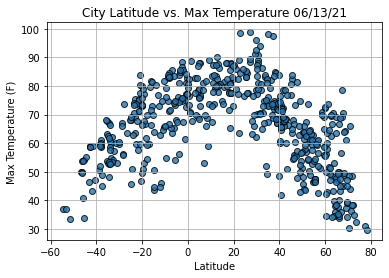

In [108]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


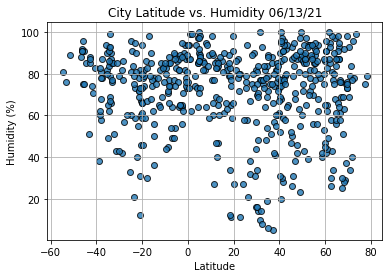

In [109]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

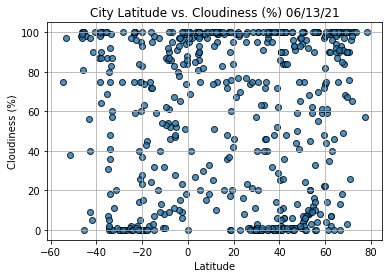

In [110]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

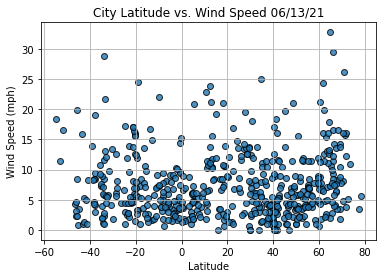

In [111]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


# Regression Analysis

In [112]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    # plt.title(title)
    plt.show()

In [113]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

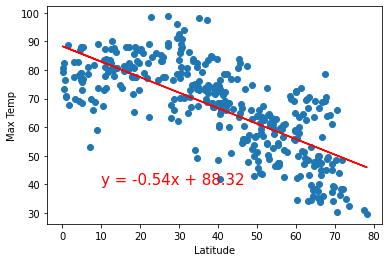

In [115]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

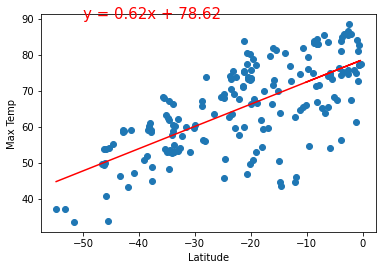

In [116]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(-50,90))


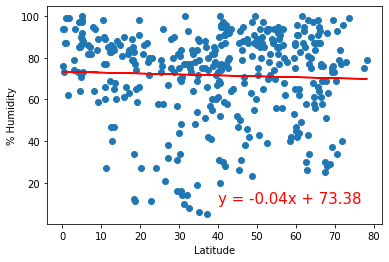

In [117]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


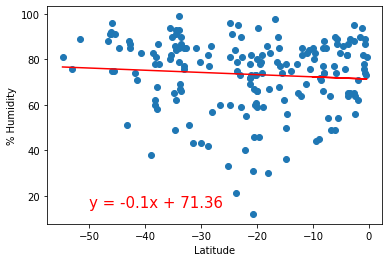

In [118]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))


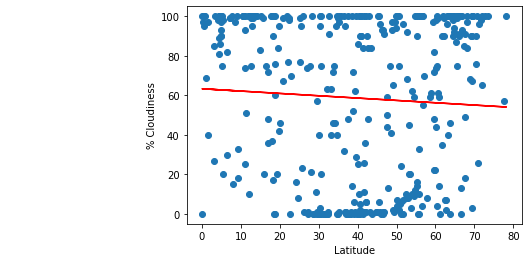

In [119]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))


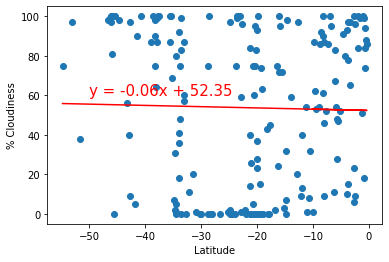

In [120]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


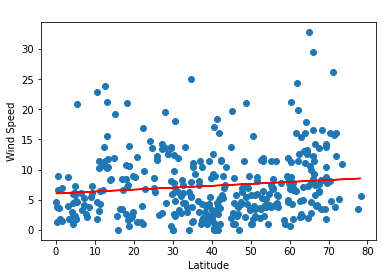

In [138]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))


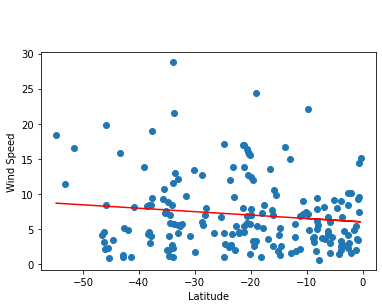

In [139]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))


# Heat Maps

In [147]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests

# Import the API key.
from config_google import api_key

In [148]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()


,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Amapa,BR,2021-06-14 02:59:58,1.0000,-52.0000,70.74,99,69,1.79
1,1,Kodiak,US,2021-06-14 02:59:58,57.7900,-152.4072,51.40,78,8,7.76
2,2,Hilo,US,2021-06-14 02:59:59,19.7297,-155.0900,82.27,91,42,3.00
3,3,Mobaye,CF,2021-06-14 02:59:59,4.3190,21.1786,69.33,97,100,1.01
4,4,Ushuaia,AR,2021-06-14 02:55:35,-54.8000,-68.3000,37.06,81,75,18.41


In [150]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=api_key)

In [166]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=temps, dissipating=False, max_intensity=300, point_radius=4) 
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig


Figure(layout=FigureLayout(height='420px'))

In [163]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))


In [167]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig


Figure(layout=FigureLayout(height='420px'))

In [168]:
# Heatmap of clouds
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig


Figure(layout=FigureLayout(height='420px'))

In [170]:
# Heatmap of clouds
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig


Figure(layout=FigureLayout(height='420px'))

# User input

In [172]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))


What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [173]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) &
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)


,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,2,Hilo,US,2021-06-14 02:59:59,19.7297,-155.0900,82.27,91,42,3.00
16,16,Elat,IL,2021-06-14 03:00:09,29.5581,34.9482,78.64,57,0,13.80
18,18,Rikitea,PF,2021-06-14 03:00:10,-23.1203,-134.9692,75.42,73,100,13.89
19,19,Puerto Escondido,MX,2021-06-14 03:00:10,15.8500,-97.0667,81.43,61,20,0.00
22,22,Hope,US,2021-06-14 03:00:12,33.6671,-93.5916,83.23,64,46,3.02
26,26,Butaritari,KI,2021-06-14 03:00:13,3.0707,172.7902,82.69,74,27,8.77
28,28,Oranjestad,AW,2021-06-14 03:00:14,12.5240,-70.0270,79.86,86,99,23.89
36,36,Abonnema,NG,2021-06-14 03:00:17,4.7084,6.7931,76.35,90,86,6.13
49,49,Portmore,JM,2021-06-14 03:00:24,17.9702,-76.8672,77.97,79,100,2.68
51,51,Hasaki,JP,2021-06-14 03:00:24,35.7333,140.8333,79.29,75,100,9.33


In [174]:
preferred_cities_df.count()

City_ID       156
City          156
Country       156
Date          156
Lat           156
Lng           156
Max Temp      156
Humidity      156
Cloudiness    156
Wind Speed    156
dtype: int64

In [175]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
2,Hilo,US,82.27,19.7297,-155.0900,
16,Elat,IL,78.64,29.5581,34.9482,
18,Rikitea,PF,75.42,-23.1203,-134.9692,
19,Puerto Escondido,MX,81.43,15.8500,-97.0667,
22,Hope,US,83.23,33.6671,-93.5916,
26,Butaritari,KI,82.69,3.0707,172.7902,
28,Oranjestad,AW,79.86,12.5240,-70.0270,
36,Abonnema,NG,76.35,4.7084,6.7931,
49,Portmore,JM,77.97,17.9702,-76.8672,
51,Hasaki,JP,79.29,35.7333,140.8333,


In [176]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": api_key
}


In [180]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found... skipping.")

Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.


In [182]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig


Figure(layout=FigureLayout(height='420px'))

In [183]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [184]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig


Figure(layout=FigureLayout(height='420px'))